##

Let's generate two signals and see if we could separate them. We use two different sources, one is a sine wave, and the other one is just a linear function

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [45]:
t = np.arange(0, 10, 0.1)

y1 = np.sin(2*t + 3)

y2 = 0.5*t - 2

Text(0,0.5,'Amplitude')

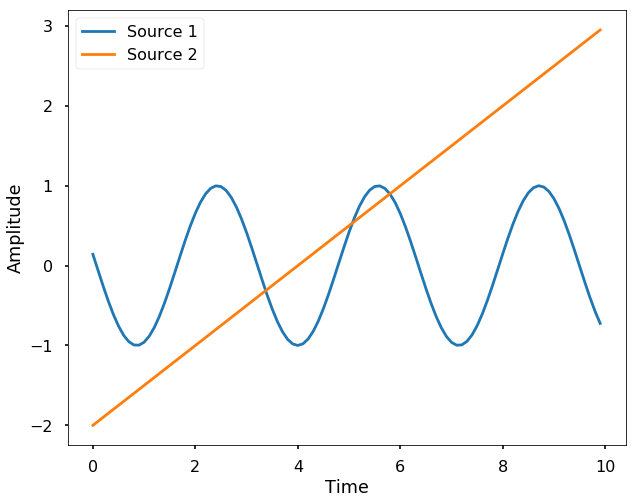

In [46]:
plt.figure(figsize = (10, 8))
plt.plot(t, y1, label = 'Source 1')
plt.plot(t, y2, label = 'Source 2')
plt.legend(loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')

Now let's assume that we have two instrument that recorded the mixture of the two sources, but they emphasize the two  sources differently (plus, we add in some white noise as well). 

In [47]:
s1 = 2*y1 + 3*y2 + 0.05* np.random.normal(size=len(t))
s2 = 0.5*y1 + 5*y2 + 0.05 * np.random.normal(size=len(t))

Text(0,0.5,'Amplitude')

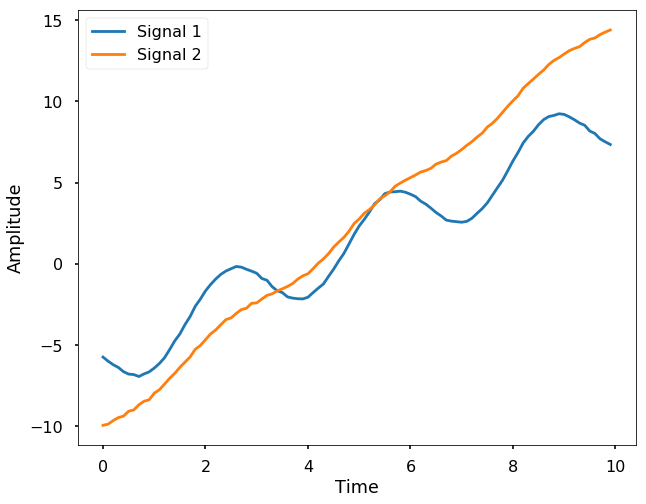

In [48]:
plt.figure(figsize = (10, 8))
plt.plot(t, s1, label = 'Signal 1')
plt.plot(t, s2, label = 'Signal 2')
plt.legend(loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')

Now let's try to use ICA to separate the two signals. 

In [49]:
from sklearn.decomposition import FastICA, PCA

In [50]:
S = np.c_[s1, s2]
S /= S.std(axis=0) 

In [60]:
# Compute ICA
ica = FastICA(n_components = 2, random_state=2)
signal_ica = ica.fit_transform(S)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [61]:
ica.components_

array([[ 0.40572946, -0.37276482],
       [-0.08718523,  0.18238434]])

Text(0,0.5,'Amplitude')

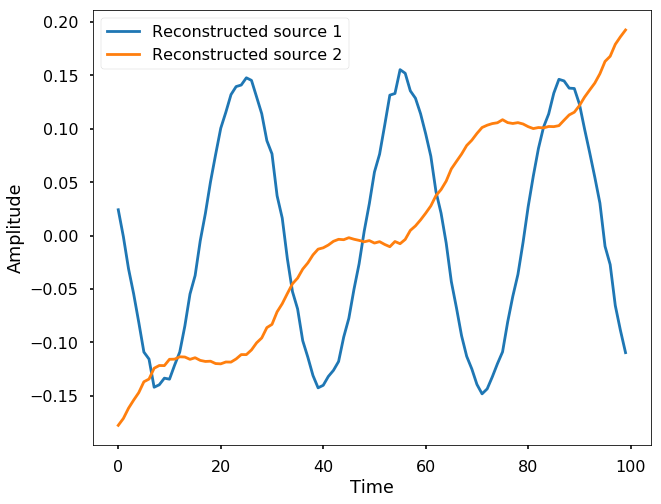

In [62]:
plt.figure(figsize = (10, 8))
l = plt.plot(signal_ica)
plt.legend(iter(l), ('Reconstructed source 1', 'Reconstructed source 2'))
plt.xlabel('Time')
plt.ylabel('Amplitude')

Let's see using PCA

In [72]:
pca = PCA(n_components=2, random_state=42)
signal_pca = pca.fit_transform(S)  # Reconstruct signals based on orthogonal components

Text(0,0.5,'Amplitude')

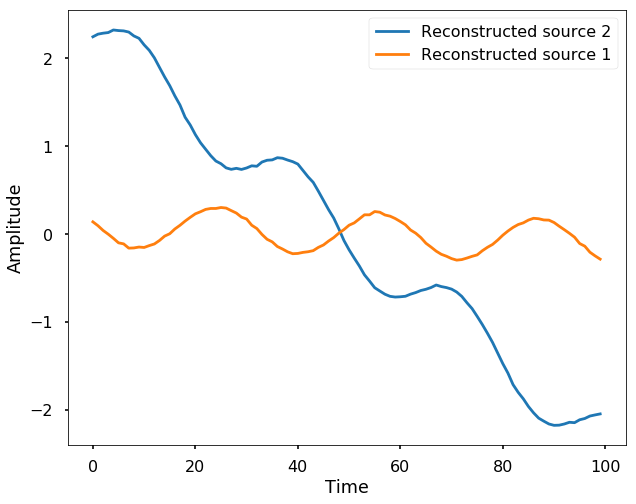

In [74]:
plt.figure(figsize = (10, 8))
l = plt.plot(signal_pca)
plt.legend(iter(l), ('Reconstructed source 2', 'Reconstructed source 1'))
plt.xlabel('Time')
plt.ylabel('Amplitude')